In [1]:
import seaborn as sns 
import numpy as np
import pandas as pd

In [2]:
df = sns.load_dataset('iris')

In [ ]:
# as logistic is used for binary classification and it has three labels so removing verginica

In [4]:
df = df[df['species']!="virginica"]

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df['species'].unique()

array(['setosa', 'versicolor'], dtype=object)

In [7]:
# It is a classification problem

In [8]:
df['species']=df['species'].map({"setosa":0,"versicolor":1})

In [9]:
## Features into Independent and Dependent

In [10]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
95,5.7,3.0,4.2,1.2
96,5.7,2.9,4.2,1.3
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1


In [12]:
y

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: species, Length: 100, dtype: int64

In [13]:
# always try to check documentation

In [14]:
# read about solver in documentation

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression()

In [17]:
from sklearn.model_selection import GridSearchCV

parameter = {'C':[0.5,1,2,3,5,6,7,9,10,30,45],'penalty':['l1','l2','elasticnet']}
log_regressor = GridSearchCV(regression,parameter,scoring='accuracy',cv=5)

log_regressor.fit(X,y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_v

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1, 2, 3, 5, 6, 7, 9, 10, 30, 45],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [18]:
print(log_regressor.best_params_)

{'C': 0.5, 'penalty': 'l2'}


In [19]:
print(log_regressor.best_score_)

1.0


In [20]:
prediction_log =log_regressor.predict(X_test)

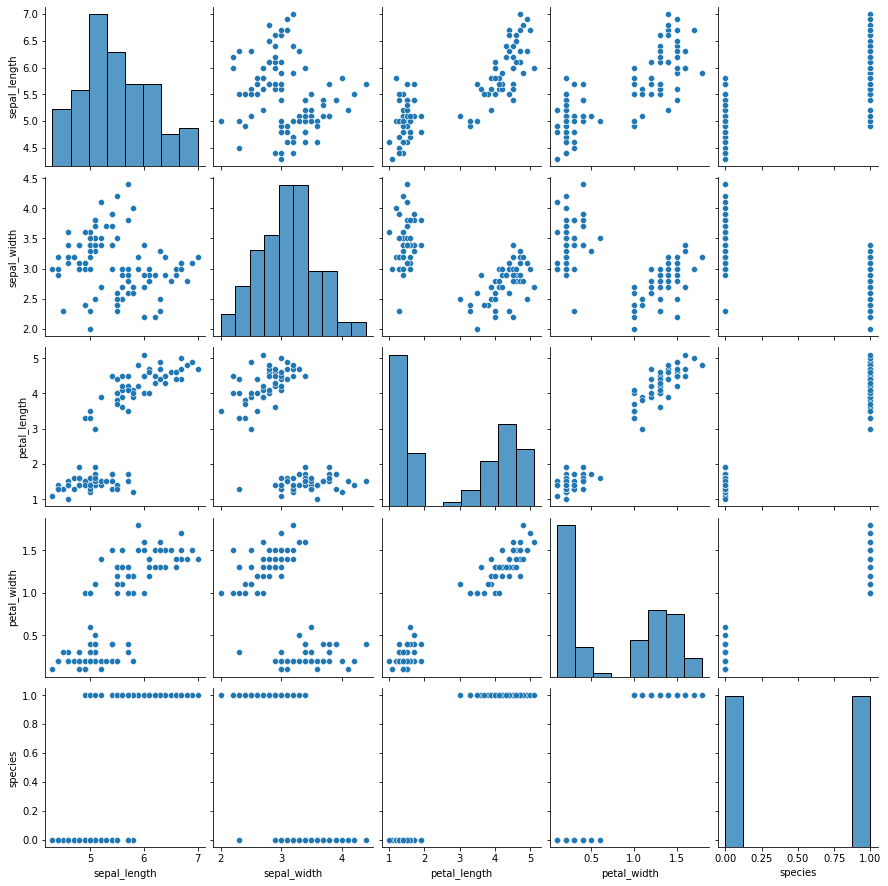

In [22]:
sns.pairplot(df) # all groups are seperated clearly thats why we get that score

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_curve,roc_auc_score,f1_score


In [24]:
confusion_matrix(y_test,prediction_log)

array([[12,  0],
       [ 0,  8]])

In [25]:
f1_score(y_test,prediction_log)

1.0

In [26]:
# Now try to do the same thing with verginica and versicolor now from starting and find score

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns

In [37]:
df = sns.load_dataset("iris")

In [38]:
df = df[df['species']!='setosa']

In [39]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [41]:
df['species'].unique()

array(['versicolor', 'virginica'], dtype=object)

In [42]:
df['species'] = df['species'].map({'versicolor':0,"virginica":1})

In [43]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [44]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [45]:
X

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [46]:
y

50     0
51     0
52     0
53     0
54     0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 100, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [48]:
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression()

In [49]:
from sklearn.model_selection import GridSearchCV

parameter = {'C':[0.5,1,2,3,5,6,7,9,10,30,45],'penalty':['l1','l2','elasticnet']}
log_regressor = GridSearchCV(regression,parameter,scoring='accuracy',cv=5)

log_regressor.fit(X,y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_v

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1, 2, 3, 5, 6, 7, 9, 10, 30, 45],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [50]:
print(log_regressor.best_params_)

{'C': 10, 'penalty': 'l2'}


In [51]:
print(log_regressor.best_score_)

0.97


In [52]:
prediction_log = log_regressor.predict(X_test)

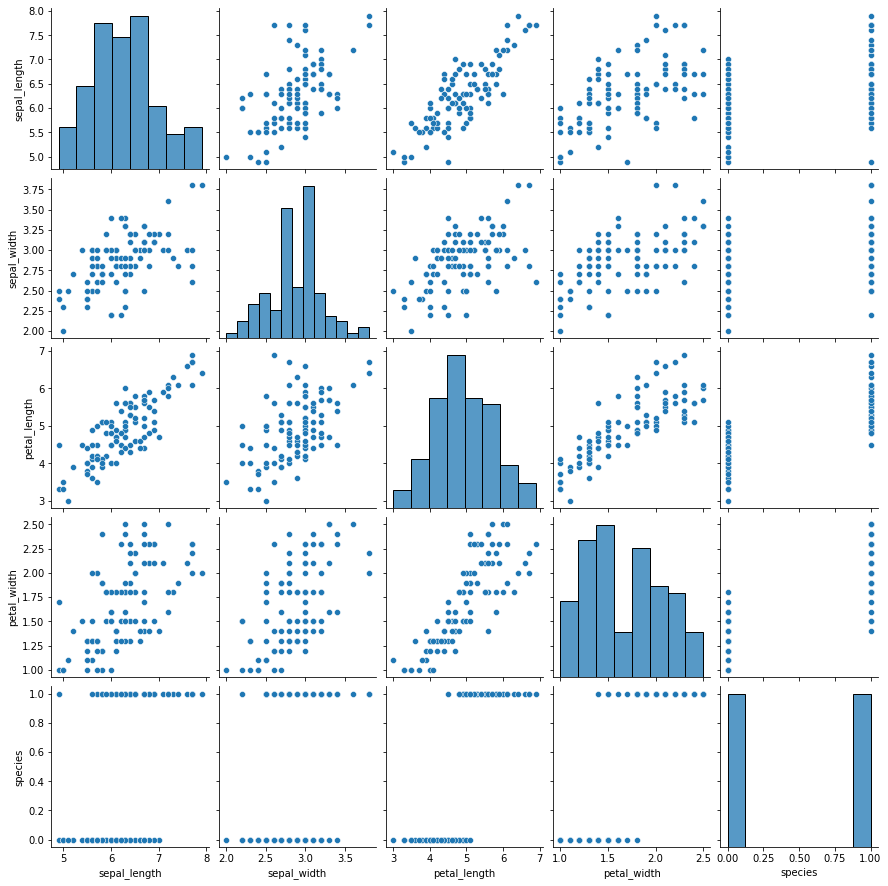

In [53]:
sns.pairplot(df)

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_curve,roc_auc_score,f1_score


In [55]:
confusion_matrix(y_test,prediction_log)

array([[11,  1],
       [ 0,  8]])

In [56]:
f1_score(y_test,prediction_log)

0.9411764705882353